# Zajęcie 07: Metoda gradientu prostego

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import warnings

# Zadanie 1: Optymalizacja funkcji dwóch zmiennych 

Funkcja do optymalizacji: $$f(x,y) = e^{\sqrt{x+3y}}$$ gdzie $x \in [1;16]$, $y \in [1;16]$

In [46]:
# Definicja funkcji
def f(x, y):
    """Funkcja celu: f(x,y) = e^sqrt(x+3y)"""
    return np.exp(np.sqrt(x + 3*y))

# Parametry optymalizacji
X_MIN, X_MAX = 1.0, 16.0
Y_MIN, Y_MAX = 1.0, 16.0
LEARNING_RATE = 0.001
MAX_ITERATIONS = 500

# Punkt startowy
x_init = 10.0
y_init = 10.0

print(f"Przedział x: [{X_MIN}, {X_MAX}]")
print(f"Przedział y: [{Y_MIN}, {Y_MAX}]")
print(f"Punkt startowy: ({x_init}, {y_init})")
print(f"Wartość funkcji w punkcie startowym: {f(x_init, y_init):.6f}")

Przedział x: [1.0, 16.0]
Przedział y: [1.0, 16.0]
Punkt startowy: (10.0, 10.0)
Wartość funkcji w punkcie startowym: 558.109578


## Obliczanie gradientu

Pochodne cząstkowe funkcji $f(x,y) = e^{\sqrt{x+3y}}$:

$$\frac{\partial f}{\partial x} = e^{\sqrt{x+3y}} \cdot \frac{1}{2\sqrt{x+3y}}$$

$$\frac{\partial f}{\partial y} = e^{\sqrt{x+3y}} \cdot \frac{3}{2\sqrt{x+3y}}$$

In [47]:
# Funkcje do obliczania gradientów

def analytical_gradient(x, y):
    sqrt_term = np.sqrt(x + 3*y)
    exp_term = np.exp(sqrt_term)
    
    df_dx = exp_term / (2 * sqrt_term)
    df_dy = 3 * exp_term / (2 * sqrt_term)
    
    return df_dx, df_dy

## Optymalizacja metodą spadku gradientu

In [48]:
x = x_init
y = y_init

# Historia optymalizacji
x_history = [x]
y_history = [y]
f_history = [f(x, y)]
grad_x_history = []
grad_y_history = []

print("Spadek Gradientu...\n")
print(f"{'Iter':<6} {'x':<12} {'y':<12} {'f(x,y)':<15} {'||grad||':<12}")
print("-" * 65)

for iteration in range(MAX_ITERATIONS):
    # Gradienty analytycznie
    df_dx, df_dy = analytical_gradient(x, y)
    
    # Krok optymalizacji (spadek wzdłuż gradientu)
    x = x - LEARNING_RATE * df_dx
    y = y - LEARNING_RATE * df_dy
    
    # Projekcja na dziedzinę
    x = np.clip(x, X_MIN, X_MAX)
    y = np.clip(y, Y_MIN, Y_MAX)
    
    # Zbierz dane
    f_val = f(x, y)
    grad_norm = np.sqrt(df_dx**2 + df_dy**2)
    
    x_history.append(x)
    y_history.append(y)
    f_history.append(f_val)
    grad_x_history.append(float(df_dx))
    grad_y_history.append(float(df_dy))
    
    if iteration % 50 == 0 or iteration == MAX_ITERATIONS - 1:
        print(f"{iteration:<6} {x:<12.6f} {y:<12.6f} {f_val:<15.8f} {grad_norm:<12.8f}")
    
    # Warunek zatrzymania
    if grad_norm < 1e-6:
        print(f"\nKonwergencja osiągnięta w iteracji {iteration}")
        break

print(f"\nOptymalny punkt: x* = {x:.8f}, y* = {y:.8f}")
print(f"Minimalna wartość funkcji: f(x*, y*) = {f_history[-1]:.8f}")
print(f"Liczba iteracji: {len(x_history) - 1}")
print(f"Norma gradientu końcowego: {np.sqrt(grad_x_history[-1]**2 + grad_y_history[-1]**2):.2e}")

Spadek Gradientu...

Iter   x            y            f(x,y)          ||grad||    
-----------------------------------------------------------------
0      9.955878     9.867633     538.92517828    139.52739462
50     8.642247     5.926741     170.76345564    53.22284395 
100    8.004581     4.013743     87.99276713     31.34261928 
150    7.595749     2.787246     54.30859511     21.63427042 
200    7.300828     1.902484     36.84424499     16.23537711 
250    7.073412     1.220235     26.47752439     12.83311151 
300    6.884380     1.000000     23.19515501     11.66987937 
350    6.701725     1.000000     22.52800397     11.44035442 
400    6.522635     1.000000     21.88664557     11.21861852 
450    6.346991     1.000000     21.26972798     11.00429811 
499    6.178092     1.000000     20.68764381     10.80112100 

Optymalny punkt: x* = 6.17809204, y* = 1.00000000
Minimalna wartość funkcji: f(x*, y*) = 20.68764381
Liczba iteracji: 500
Norma gradientu końcowego: 1.08e+01


## 3D Wizualizacja powierzchni funkcji i trajektorii optymalizacji:

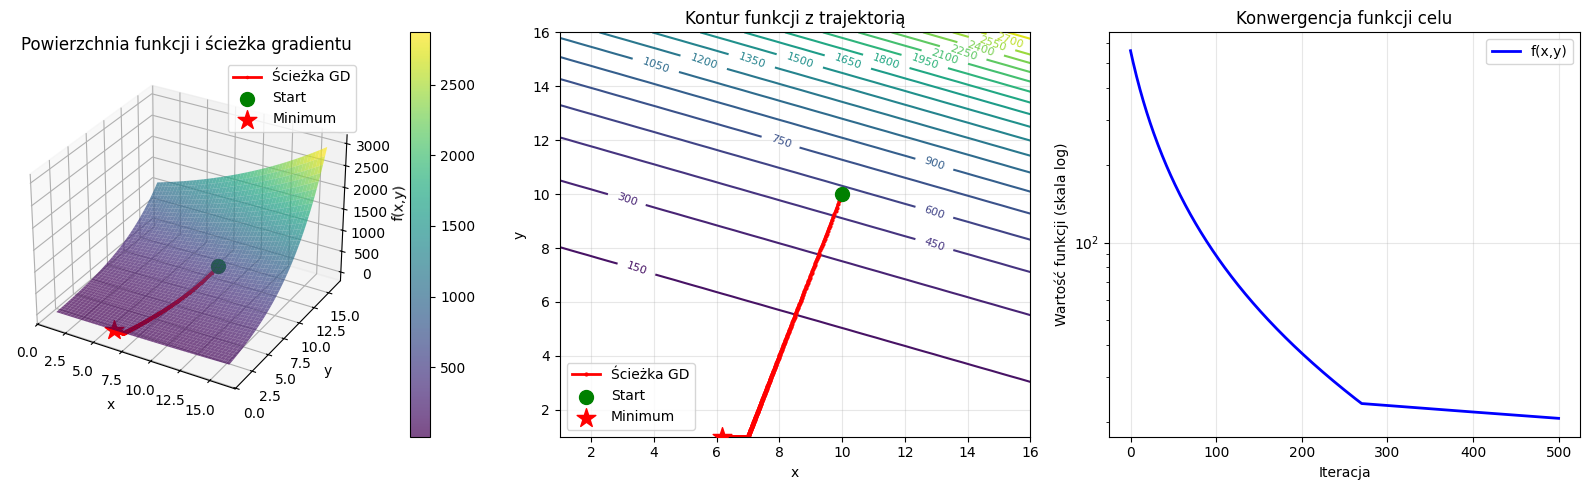

In [49]:
x_range = np.linspace(X_MIN, X_MAX, 50)
y_range = np.linspace(Y_MIN, Y_MAX, 50)
X_mesh, Y_mesh = np.meshgrid(x_range, y_range)
Z_mesh = f(X_mesh, Y_mesh)

# Wizualizacja 1: Powierzchnia 3D z trajektorią
fig = plt.figure(figsize=(16, 5))

# Wykres 3D
ax1 = fig.add_subplot(131, projection='3d')
surf = ax1.plot_surface(X_mesh, Y_mesh, Z_mesh, cmap='viridis', alpha=0.7, edgecolor='none')
ax1.plot(x_history, y_history, f_history, 'r.-', linewidth=2, markersize=3, label='Ścieżka GD')
ax1.scatter(x_history[0], y_history[0], f_history[0], c='green', s=100, marker='o', label='Start')
ax1.scatter(x_history[-1], y_history[-1], f_history[-1], c='red', s=200, marker='*', label='Minimum')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x,y)')
ax1.set_title('Powierzchnia funkcji i ścieżka gradientu')
ax1.legend()
fig.colorbar(surf, ax=ax1, pad=0.1)

# Kontur z trajektorią
ax2 = fig.add_subplot(132)
contour = ax2.contour(X_mesh, Y_mesh, Z_mesh, levels=20, cmap='viridis')
ax2.clabel(contour, inline=True, fontsize=8)
ax2.plot(x_history, y_history, 'r.-', linewidth=2, markersize=4, label='Ścieżka GD')
ax2.scatter(x_history[0], y_history[0], c='green', s=100, marker='o', label='Start', zorder=5)
ax2.scatter(x_history[-1], y_history[-1], c='red', s=200, marker='*', label='Minimum', zorder=5)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Kontur funkcji z trajektorią')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Konwergencja
ax3 = fig.add_subplot(133)
ax3.semilogy(range(len(f_history)), f_history, 'b-', linewidth=2, label='f(x,y)')
ax3.set_xlabel('Iteracja')
ax3.set_ylabel('Wartość funkcji (skala log)')
ax3.set_title('Konwergencja funkcji celu')
ax3.grid(True, alpha=0.3)
ax3.legend()

plt.tight_layout()
plt.show()

## Podsumowanie wyników Zadania 1

In [50]:
print("PODSUMOWANIE WYNIKÓW - ZADANIE 1")

x_opt = x_history[-1]
y_opt = y_history[-1]
f_opt = f_history[-1]

print(f"\n1. PUNKT MINIMALNY:")
print(f"   x* = {x_opt:.8f}")
print(f"   y* = {y_opt:.8f}")
print(f"   f(x*, y*) = {f_opt:.8f}")

# Analiza wartości na narożnikach
print(f"\n2. WARTOŚCI NA NAROŻNIKACH DZIEDZINY:")
corners = [(1, 1), (1, 16), (16, 1), (16, 16)]
for x_c, y_c in corners:
    f_c = f(x_c, y_c)
    print(f"   f({x_c:2d}, {y_c:2d}) = {f_c:.8f}")

min_corner = min(corners, key=lambda p: f(p[0], p[1]))
f_min_corner = f(min_corner[0], min_corner[1])
print(f"   → Minimum na narożnikach: f{min_corner} = {f_min_corner:.8f}")

# Statystyka konwergencji
print(f"\n3. STATYSTYKA KONWERGENCJI:")
print(f"   Liczba iteracji: {len(x_history) - 1}")
print(f"   Redukcja funkcji: {((f_history[0] - f_history[-1]) / f_history[0] * 100):.2f}%")

# Gradienty końcowe
df_dx_final, df_dy_final = analytical_gradient(x_opt, y_opt)
grad_norm_final = np.sqrt(df_dx_final**2 + df_dy_final**2)

print(f"\n4. GRADIENTY W PUNKCIE OPTYMALNYM:")
print(f"   ∂f/∂x = {df_dx_final:.8f}")
print(f"   ∂f/∂y = {df_dy_final:.8f}")
print(f"   ||∇f|| = {grad_norm_final:.2e}")

PODSUMOWANIE WYNIKÓW - ZADANIE 1

1. PUNKT MINIMALNY:
   x* = 6.17809204
   y* = 1.00000000
   f(x*, y*) = 20.68764381

2. WARTOŚCI NA NAROŻNIKACH DZIEDZINY:
   f( 1,  1) = 7.38905610
   f( 1, 16) = 1096.63315843
   f(16,  1) = 78.17101632
   f(16, 16) = 2980.95798704
   → Minimum na narożnikach: f(1, 1) = 7.38905610

3. STATYSTYKA KONWERGENCJI:
   Liczba iteracji: 500
   Redukcja funkcji: 96.29%

4. GRADIENTY W PUNKCIE OPTYMALNYM:
   ∂f/∂x = 3.41432478
   ∂f/∂y = 10.24297434
   ||∇f|| = 1.08e+01


# Zadanie 2: Propagacja wsteczna w sieci neuronowej

Architektura sieci neuronowej dla **wariantu 3**:
- **Warstwa 1**: input_dim=2, output_dim=2, activation="sigmoid"
- **Warstwa 2**: input_dim=2, output_dim=1, activation="sigmoid"

Funkcja aktywacji sigmoid: $$\sigma(z) = \frac{1}{1 + e^{-z}}$$

Pochodna sigmoid: $$\sigma'(z) = \sigma(z)(1 - \sigma(z))$$

In [51]:
# Architektura sieci neuronowej - Wariant 3
nn_architecture = [
    {"input_dim": 2, "output_dim": 2, "activation": "sigmoid"},
    {"input_dim": 2, "output_dim": 1, "activation": "sigmoid"}
]


## Propagacja do przodu

In [52]:
# Funkcje aktywacji
def sigmoid(z):
    """Funkcja sigmoidy"""
    return 1.0 / (1.0 + np.exp(-np.clip(z, -500, 500)))

def sigmoid_derivative(z):
    """Pochodna sigmoidy względem z"""
    sig = sigmoid(z)
    return sig * (1 - sig)

# Inicjalizacja wag i bias'ów
np.random.seed(42)

def initialize_network(architecture):
    """Inicjalizacja wag i bias'ów"""
    params = {}
    
    for idx, layer in enumerate(architecture):
        layer_idx = idx + 1
        input_dim = layer["input_dim"]
        output_dim = layer["output_dim"]
        
        # Inicjalizacja wag (Xavier)
        params[f"W{layer_idx}"] = np.random.randn(output_dim, input_dim) * np.sqrt(1.0 / input_dim)
        params[f"b{layer_idx}"] = np.zeros((output_dim, 1))
    
    return params

params = initialize_network(nn_architecture)

print("\nInicjalizowane parametry sieci:")
for key, val in params.items():
    print(f"  {key}: shape {val.shape}")

# Propagation
def forward_propagation(X, params, architecture):
    cache = {"A0": X}
    A = X
    
    for idx, layer in enumerate(architecture):
        layer_idx = idx + 1
        W = params[f"W{layer_idx}"]
        b = params[f"b{layer_idx}"]
        
        # Liniowe: Z = W*A + b
        Z = np.dot(W, A) + b
        cache[f"Z{layer_idx}"] = Z
        
        # Aktywacja
        if layer["activation"] == "sigmoid":
            A = sigmoid(Z)
        else:
            raise ValueError(f"Unknown activation: {layer['activation']}")
        
        cache[f"A{layer_idx}"] = A
    
    return A, cache

X_sample = np.array([[0.5], [0.3]])
y_sample = np.array([[0.8]])

output, cache = forward_propagation(X_sample, params, nn_architecture)

print(f"  Wejście X: shape {X_sample.shape}")
print(f"  Wyjście: shape {output.shape}, wartość: {output[0,0]:.6f}")


Inicjalizowane parametry sieci:
  W1: shape (2, 2)
  b1: shape (2, 1)
  W2: shape (1, 2)
  b2: shape (1, 1)
  Wejście X: shape (2, 1)
  Wyjście: shape (1, 1), wartość: 0.451677


## Propagacja wsteczna

Równania propagacji wstecznej:

$$dZ^{[l]} = dA^{[l]} * \sigma'(Z^{[l]})$$

$$dW^{[l]} = \frac{1}{m} dZ^{[l]} (A^{[l-1]})^T$$

$$db^{[l]} = \frac{1}{m} \sum dZ^{[l]}$$

$$dA^{[l-1]} = (W^{[l]})^T dZ^{[l]}$$

In [53]:
# Funkcja straty (Binary Cross-Entropy)
def compute_loss(y_true, y_pred):
    m = y_true.shape[1]
    epsilon = 1e-7
    loss = -(y_true * np.log(np.clip(y_pred, epsilon, 1)) + 
             (1 - y_true) * np.log(np.clip(1 - y_pred, epsilon, 1)))
    return np.mean(loss)

# Propagacja wsteczna
def backward_propagation(y_true, y_pred, cache, params, architecture):
    m = y_true.shape[1]
    grads = {}
    
    # Pochodna straty względem wyjścia: dL/dA
    dA = -(np.divide(y_true, np.clip(y_pred, 1e-7, 1)) - 
           np.divide(1 - y_true, np.clip(1 - y_pred, 1e-7, 1)))
    
    # Iteracja przez warstwy w odwrotnej kolejności
    num_layers = len(architecture)
    
    for layer_idx in range(num_layers, 0, -1):
        layer = architecture[layer_idx - 1]
        
        A_prev = cache[f"A{layer_idx - 1}"]
        Z = cache[f"Z{layer_idx}"]
        W = params[f"W{layer_idx}"]
        
        # Gradient względem Z
        if layer["activation"] == "sigmoid":
            dZ = dA * sigmoid_derivative(Z)
        
        # Gradienty względem W, b
        dW = (1/m) * np.dot(dZ, A_prev.T)
        db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
        
        # Gradient dla poprzedniej warstwy
        if layer_idx > 1:
            dA = np.dot(W.T, dZ)
        
        grads[f"dW{layer_idx}"] = dW
        grads[f"db{layer_idx}"] = db
    
    return grads

# Obliczenie wartośći loss i gradienty dla przykładu
loss = compute_loss(y_sample, output)
grads = backward_propagation(y_sample, output, cache, params, nn_architecture)

print(f"\nTest Wsteczna Propagacja:")
print(f"  Strata (Binary Cross-Entropy): {loss:.6f}")
print(f"\n  Obliczone gradienty:")
for key in sorted(grads.keys()):
    print(f"    {key}: shape {grads[key].shape}, norma {np.linalg.norm(grads[key]):.8f}")


Test Wsteczna Propagacja:
  Strata (Binary Cross-Entropy): 0.756009

  Obliczone gradienty:
    dW1: shape (2, 2), norma 0.01143345
    dW2: shape (1, 2), norma 0.28945989
    db1: shape (2, 1), norma 0.01960821
    db2: shape (1, 1), norma 0.34832299


## Podsumowanie i Wnioski - Zadanie 2

In [54]:
print("PODSUMOWANIE - ZADANIE 2: PROPAGACJA WSTECZNA")

print("\n2. LICZBA PARAMETRÓW:")
total_params = sum(np.prod(params[k].shape) for k in params)
print(f"   W1: {params['W1'].shape} = {np.prod(params['W1'].shape)} parametrów")
print(f"   b1: {params['b1'].shape} = {np.prod(params['b1'].shape)} parametrów")
print(f"   W2: {params['W2'].shape} = {np.prod(params['W2'].shape)} parametrów")
print(f"   b2: {params['b2'].shape} = {np.prod(params['b2'].shape)} parametrów")
print(f"   ────────────────────────────────")
print(f"   RAZEM: {total_params} parametrów")

print(f"   Wejście:  X = {X_sample.T}")
print(f"   Cel:      y = {y_sample.T}")
print(f"   Wyjście:  ŷ = {output.T}")
print(f"   Strata:   L = {compute_loss(y_sample, output):.6f}")

print("\n4. NORMY GRADIENTÓW:")
for key in sorted(grads.keys()):
    grad = grads[key]
    print(f"   {key}: ||grad|| = {np.linalg.norm(grad):.8f}, shape = {grad.shape}")

print("\n5. WNIOSKI:")
print("   ✓ Propagacja w przód:")
print("     - Dane przepływają przez 2 warstwy sigmoid'ów")
print("     - Każdy neuron oblicza: A[l] = σ(W[l]·A[l-1] + b[l])")
print("     - Wyjście z przedziału (0, 1) - gotowe do klasyfikacji binarnej")
print("")
print("   ✓ Propagacja wsteczna:")
print("     - Gradienty obliczane od ostatniej warstwy w kierunku wejścia")
print("     - Dla sigmoid'u: dZ = dA ⊙ σ'(Z) = dA ⊙ σ(Z)·(1-σ(Z))")
print("     - Gradienty W: dW = (1/m)·dZ·A^T")
print("     - Gradienty b: db = (1/m)·sum(dZ)")
print("")
print("   ✓ Znaczenie normy gradientu:")
print(f"     - Norma wskazuje siłę sygnału gradientu")
print(f"     - Większa norma = szybsza zmiana dla danego parametru")
print(f"     - Użyteczna do kontroli zbieżności i lr scheduling")
print("")
print("   ✓ Zastosowania:")
print("     - Klasyfikacja binarna (logistyczna regresja)")
print("     - Uczenie sieci poprzez mininimalizację straty")
print("     - Optymalizacja za pomocą gradient descent")

PODSUMOWANIE - ZADANIE 2: PROPAGACJA WSTECZNA

2. LICZBA PARAMETRÓW:
   W1: (2, 2) = 4 parametrów
   b1: (2, 1) = 2 parametrów
   W2: (1, 2) = 2 parametrów
   b2: (1, 1) = 1 parametrów
   ────────────────────────────────
   RAZEM: 9 parametrów
   Wejście:  X = [[0.5 0.3]]
   Cel:      y = [[0.8]]
   Wyjście:  ŷ = [[0.45167701]]
   Strata:   L = 0.756009

4. NORMY GRADIENTÓW:
   dW1: ||grad|| = 0.01143345, shape = (2, 2)
   dW2: ||grad|| = 0.28945989, shape = (1, 2)
   db1: ||grad|| = 0.01960821, shape = (2, 1)
   db2: ||grad|| = 0.34832299, shape = (1, 1)

5. WNIOSKI:
   ✓ Propagacja w przód:
     - Dane przepływają przez 2 warstwy sigmoid'ów
     - Każdy neuron oblicza: A[l] = σ(W[l]·A[l-1] + b[l])
     - Wyjście z przedziału (0, 1) - gotowe do klasyfikacji binarnej

   ✓ Propagacja wsteczna:
     - Gradienty obliczane od ostatniej warstwy w kierunku wejścia
     - Dla sigmoid'u: dZ = dA ⊙ σ'(Z) = dA ⊙ σ(Z)·(1-σ(Z))
     - Gradienty W: dW = (1/m)·dZ·A^T
     - Gradienty b: db = (1/m)·